# Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [9]:
import pandas as pd
import numpy as np
import matplotlib

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных

In [11]:
feature_names = boston["feature_names"]
data = boston["data"]
X = pd.DataFrame(data, columns=feature_names)
target = boston["target"]
y = pd.DataFrame(target, columns=["price"])

In [12]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [13]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

In [17]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

print('Данные до понижения размерности:\t{}'.format(X_train_scaled.shape))
print('Данные после понижения размерности:\t{}'.format(X_train_tsne.shape))

Данные до понижения размерности:	(404, 13)
Данные после понижения размерности:	(404, 2)


Постройте диаграмму рассеяния на этих данных.

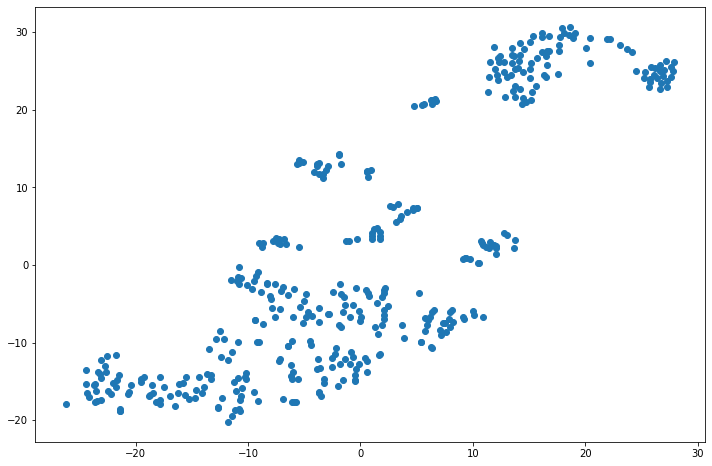

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [21]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 477 to 102
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 44.2 KB


In [22]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)
train_labels = model.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

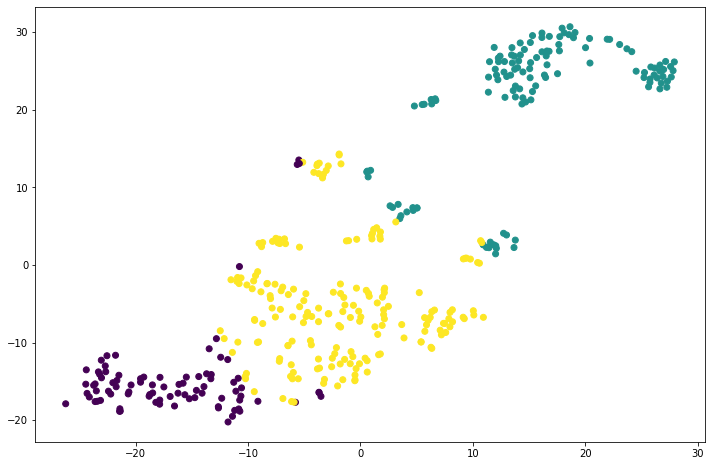

In [23]:
plt.figure(figsize = (12, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [24]:
print('кластер 1: ', y_train[train_labels == 0].mean());
print('кластер 2:', y_train[train_labels == 1].mean());
print('кластер 3:', y_train[train_labels == 2].mean());

кластер 1:  price    27.788372
dtype: float64
кластер 2: price    16.165354
dtype: float64
кластер 3: price    24.958115
dtype: float64


In [25]:
print('кластер 1, средний CRIM : ', X_train['CRIM'][train_labels == 0].mean());
print('кластер 2, средний CRIM :', X_train['CRIM'][train_labels == 1].mean());
print('кластер 3, средний CRIM :', X_train['CRIM'][train_labels == 2].mean());

кластер 1, средний CRIM :  0.07356558139534886
кластер 2, средний CRIM : 10.797028425196853
кластер 3, средний CRIM : 0.42166020942408367


### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

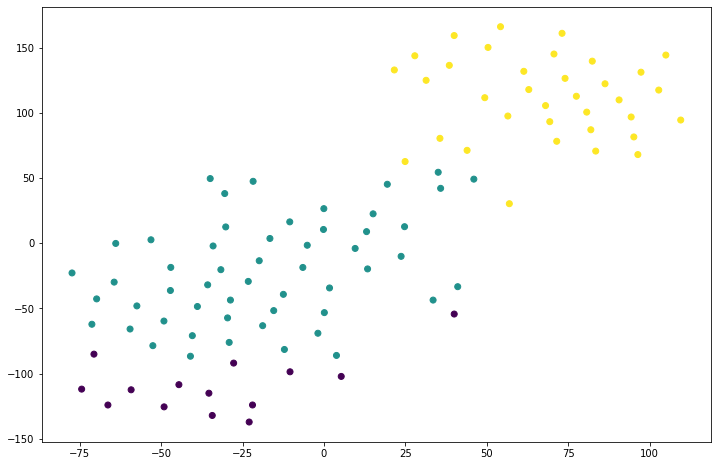

In [26]:
scaler = StandardScaler()

X_test_tsne = tsne.fit_transform(X_test_scaled)
test_labels = model.fit_predict(X_test_scaled)

plt.figure(figsize = (12, 8))
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)
plt.show()

In [27]:
print('кластер 1: ', y_test[test_labels == 0].mean());
print('кластер 2:', y_test[test_labels == 1].mean());
print('кластер 3:', y_test[test_labels == 2].mean());

кластер 1:  price    33.871429
dtype: float64
кластер 2: price    21.55283
dtype: float64
кластер 3: price    16.437143
dtype: float64


In [28]:
print('кластер 1, средний CRIM : ', X_test['CRIM'][test_labels == 0].mean());
print('кластер 2, средний CRIM :', X_test['CRIM'][test_labels == 1].mean());
print('кластер 3, средний CRIM :', X_test['CRIM'][test_labels == 2].mean());

кластер 1, средний CRIM :  0.08618571428571427
кластер 2, средний CRIM : 0.25200716981132076
кластер 3, средний CRIM : 10.165531142857143
